# SVM classification with anisotropy factors

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import utils

from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay


In [2]:
CI02 = utils.load_data("data/for_learning_plus/CI02.npy")
CI04 = utils.load_data("data/for_learning_plus/CI04.npy")
CI06 = utils.load_data("data/for_learning_plus/CI06.npy")
CI09 = utils.load_data("data/for_learning_plus/CI09.npy")
CI21 = utils.load_data("data/for_learning_plus/CI21.npy")

In [3]:
C1_02 = CI02[CI02['Y']==1]
C1_04 = CI04[CI04['Y']==1]
C1_09 = CI09[CI09['Y']==1]
C1_21 = CI21[CI21['Y']==1]

C0_02 = CI02[CI02['Y']==0]
C0_04 = CI04[CI04['Y']==0]
C0_09 = CI09[CI09['Y']==0]
C0_21 = CI21[CI21['Y']==0]

nb_c1_02 = np.shape(C1_02)[0]
nb_c1_04 = np.shape(C1_04)[0]
nb_c1_09 = np.shape(C1_09)[0]
nb_c1_21 = np.shape(C1_21)[0]

C0_02_eq = C0_02.sample(nb_c1_02)
C0_04_eq = C0_04.sample(nb_c1_04)
C0_09_eq = C0_09.sample(nb_c1_09)
C0_21_eq = C0_21.sample(nb_c1_21)

data_eq = pd.concat((C0_02_eq,C1_02,C0_04_eq,C1_04,C0_09_eq,C1_09,C0_21_eq,C1_21))

In [5]:
X = data_eq[['dist2GB', 'dist2TJ', 'schmid', 'diff_schmid',
                    'misangle', 'eqStrain', 'eqStress', 'act_pr', 'act_py', 'work',
                             'relativ_an', 'fractional_an', 'volratio_an', 'flatness_an']] 

y = data_eq['Y']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # test_set random 20%

In [6]:
clf = svm.SVC(kernel="rbf",class_weight='balanced')

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [7]:
acc = metrics.accuracy_score(y_test, y_pred)
prec = metrics.precision_score(y_test, y_pred)
rec = metrics.recall_score(y_test, y_pred)
cm = metrics.confusion_matrix(y_test, y_pred)
spec = cm[0,0] / (cm[0,0] + cm[0,1])
utils.plot_lstats(acc,prec,rec,spec,model="SVM_balance: train = CI02 80% test = CI02 20%")

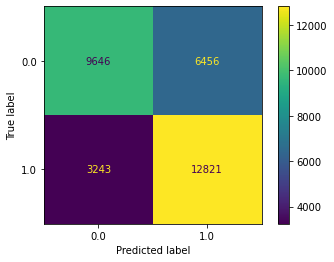

In [8]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)  
plt.show()

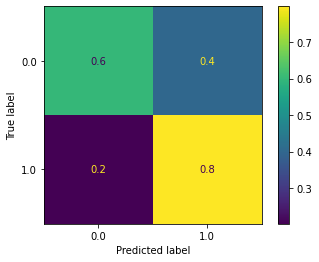

In [9]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred,normalize="true")  
plt.show()

## Predict on CI02

In [10]:
X_val = CI02[['dist2GB', 'dist2TJ', 'schmid', 'diff_schmid',
                    'misangle', 'eqStrain', 'eqStress', 'act_pr', 'act_py', 'work',
                             'relativ_an', 'fractional_an', 'volratio_an', 'flatness_an']] 
y_val = CI02['Y'] 

In [11]:
y_pred = clf.predict(X_val)

In [12]:
acc = metrics.accuracy_score(y_val, y_pred)
prec = metrics.precision_score(y_val, y_pred)
rec = metrics.recall_score(y_val, y_pred)
cm = metrics.confusion_matrix(y_val, y_pred)
spec = cm[0,0] / (cm[0,0] + cm[0,1])
utils.plot_lstats(acc,prec,rec,spec,model="SVM_balance: train = CI02 test = CI02")

In [13]:
ConfusionMatrixDisplay.from_predictions(y_val, y_pred)  
plt.show()

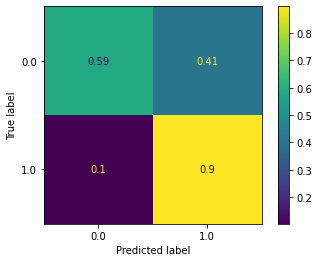

In [14]:
ConfusionMatrixDisplay.from_predictions(y_val, y_pred,normalize="true")  
plt.show()

In [15]:
im_shape = np.shape(np.load("data/for_learning_plus/CI02.npy"))
utils.plot_pred_proj(y_pred,y_val,im_shape)

## Predict on CI06

In [16]:
X_val = CI06[['dist2GB', 'dist2TJ', 'schmid', 'diff_schmid',
                    'misangle', 'eqStrain', 'eqStress', 'act_pr', 'act_py', 'work',
                             'relativ_an', 'fractional_an', 'volratio_an', 'flatness_an']] 
y_val = CI06['Y'] 

In [17]:
y_pred = clf.predict(X_val)

In [18]:
acc = metrics.accuracy_score(y_val, y_pred)
prec = metrics.precision_score(y_val, y_pred)
rec = metrics.recall_score(y_val, y_pred)
cm = metrics.confusion_matrix(y_val, y_pred)
spec = cm[0,0] / (cm[0,0] + cm[0,1])
utils.plot_lstats(acc,prec,rec,spec,model="SVM_balance: train = CI02 test = CI06")

In [19]:
ConfusionMatrixDisplay.from_predictions(y_val, y_pred)  
plt.show()

In [20]:
ConfusionMatrixDisplay.from_predictions(y_val, y_pred,normalize="true")  
plt.show()

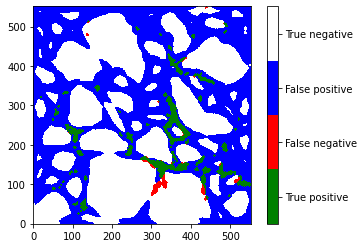

In [21]:
im_shape = np.shape(np.load("data/for_learning_plus/CI06.npy"))
utils.plot_pred_proj(y_pred,y_val,im_shape)